### Transfer learning

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loss =  [1.2834968566894531, 0.547101616859436, 0.33846157789230347, 0.2499847412109375, 0.21531367301940918, 0.2193189263343811, 0.12523053586483002, 0.06962546706199646, 0.044374819844961166, 0.026085173711180687]
accuracy =  [0.6735818386077881, 0.8246353268623352, 0.8823338747024536, 0.9072933793067932, 0.9286872148513794, 0.9277147650718689, 0.9542949795722961, 0.9799027442932129, 0.9860615730285645, 0.9948136210441589]
val_loss =  [0.8915097713470459, 0.8191027045249939, 0.9248319268226624, 0.9302500486373901, 0.8227318525314331, 0.8640727996826172, 0.957097589969635, 1.047308325767517, 0.8142166137695312, 0.8419004082679749]
val_accuracy =  [0.7338709831237793, 0.75, 0.7634408473968506, 0.75, 0.7688171863555908, 0.7930107712745667, 0.7526881694793701, 0.7607526779174805, 0.8037634491920471, 0.774193525314331]

<Axes: title={'center': 'Losses'}>

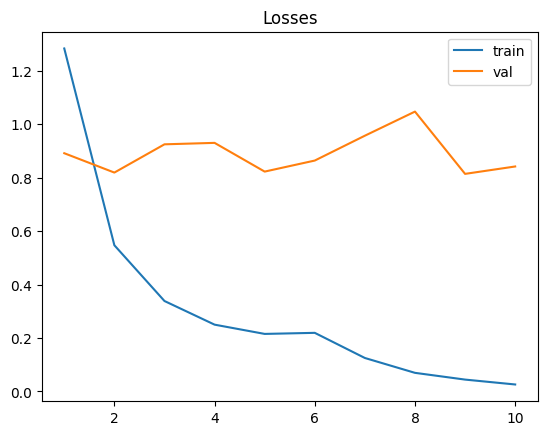

In [3]:
epochs_list = [i+1 for i in range(10)]
plt.title("Losses")
sns.lineplot(x=epochs_list, y=loss, label="train")
sns.lineplot(x=epochs_list, y=val_loss, label="val")

<Axes: title={'center': 'Accuracy'}>

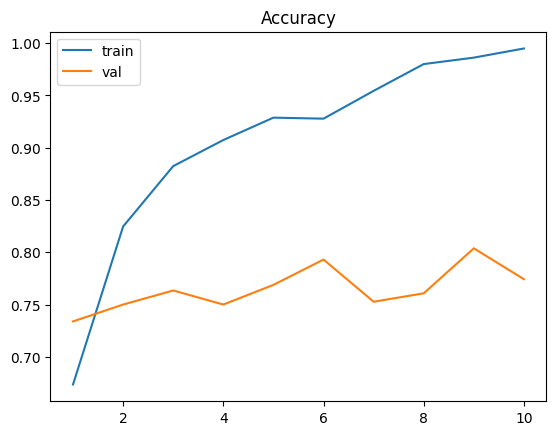

In [4]:
plt.title("Accuracy")
sns.lineplot(x=epochs_list, y=accuracy, label="train")
sns.lineplot(x=epochs_list, y=val_accuracy, label="val")

In [5]:
import pickle
def load_var(file: str):
    with open(file, 'rb') as f:
        return pickle.load(f)

In [6]:
model_xc_preds = load_var('vars/model_xc_preds.txt')

2024-02-15 10:07:14.938489: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-15 10:07:15.004996: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 10:07:15.005059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 10:07:15.011164: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 10:07:15.035321: I tensorflow/core/platform/cpu_feature_guar

In [7]:
import math

def calculate_subplot_grid_dimensions(N):
    num_cols = math.ceil(math.sqrt(N))
    num_rows = math.ceil(N / num_cols)
    return num_rows, num_cols

In [8]:
def showImages(images: list, figy=3, v=None, cmap='binary', titles=[]):
    ly = len(images[0])
    lx = len(images[0][0])
    ratio = ly/lx
    figsize = (figy*ratio,figy)
    plt.figure(figsize= figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.axis("off")
        if i < len(titles):
            plt.title(titles[i])
        if v:
            plt.imshow(images[i], cmap=cmap, vmax=v[0], vmin=v[1])
        else:
            plt.imshow(images[i], cmap=cmap)

    
    #plt.subplots_adjust(wspace=0.2, hspace=0.3)

    plt.show()

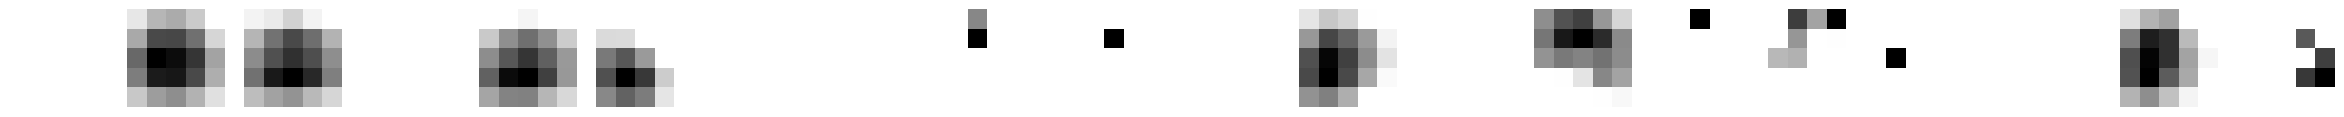

In [9]:
showImages([model_xc_preds[0][:,:,i] for i in range(20)], figy=30)

In [10]:
[model_xc_preds[0][:,:,3]]

[<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32)>]

In [11]:
def showImages(images: list, figy=3, cmap='gray', v=None):
    num_rows, num_cols = calculate_subplot_grid_dimensions(len(images))
                                                           
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(figy, figy), subplot_kw={'xticks': [], 'yticks': []})
    
    fig.subplots_adjust(hspace=0, wspace=0)
    
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            if v:
                ax.imshow(images[i], cmap=cmap, vmax=v[1], vmin=v[0])
            else:
                ax.imshow(images[i], cmap=cmap)
            for spine in ax.spines.values():
                spine.set_edgecolor('red')
                spine.set_linewidth(.3)
    
    # Show the plot
    plt.show()


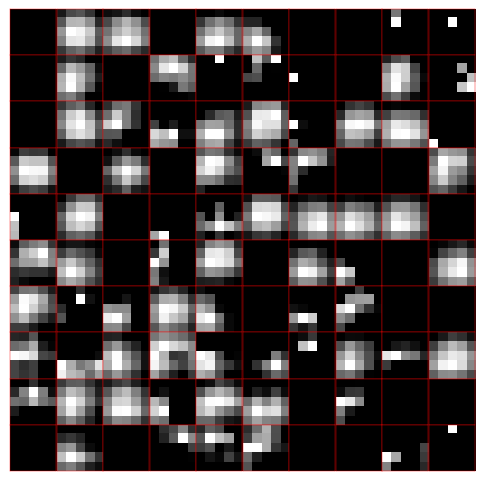

In [12]:
showImages([model_xc_preds[0][:,:,i] for i in range(100)], figy=6)

In [13]:
layer = 'vars/base_layers/1-block1_conv1'
base_model = np.array(load_var(layer))

In [14]:
base_model[:, :,:,0,1]

array([[[ 0.06770695,  0.15527768,  0.10833047],
        [-0.00267535,  0.00771339, -0.01909655],
        [-0.05175061, -0.03332756, -0.05689356]]], dtype=float32)

In [15]:
base_model.shape

(1, 3, 3, 3, 32)

In [16]:
base_model.shape[4]

32

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

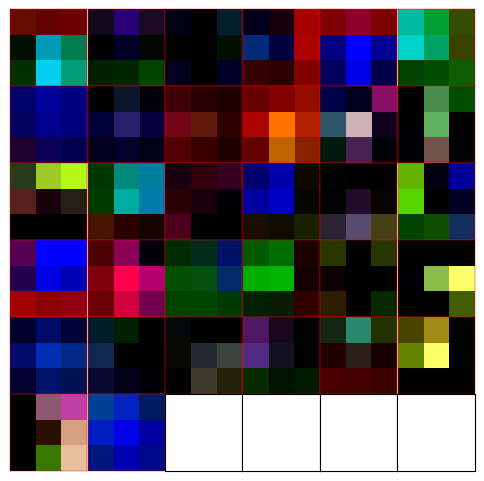

In [18]:
kernel_rgb = [np.array([[(base_model[0, y, x, 0, i], base_model[0, y, x, 1, i], base_model[0, y, x,  2, i]) for x in range(base_model.shape[2])] for y in range(base_model.shape[1])]) for i in range(32)]

showImages(kernel_rgb, figy=6, v=(-1,1))

In [19]:
from tqdm.auto import tqdm
class ColveOutput:
    def __init__(self, kernel: np.array, channels: list[np.array], output: np.array):
        self.kernel = kernel
        if len(channels) == 3:
            self.mode = "rgb"
            self.r = channels[0]
            self.g = channels[1]
            self.b = channels[2]
        else:
            self.mode = "multi"
            self.channels = channels
        self.output = output

    def get_rgb(self):
        return np.array([[(self.r[y,x], self.g[y,x], self.b[y,x]) for x in range(self.r.shape[1])] for y in range(self.r.shape[0])])

def convolve2d(metrics: np.array, kernel: np.array, strides: int, zero_padding: int):
    assert strides > 0
    assert zero_padding >= 0
    assert len(kernel) == len(kernel[0])

    extent = len(kernel)
    metrics = np.pad(metrics, (zero_padding, zero_padding))
    result = []
    for y in range(0, len(metrics) - 2*zero_padding, strides):
        row = []
        for x in range(0, len(metrics[0]) - 2*zero_padding, strides):
            dot_sum = np.sum(metrics[y: y + extent, x: x + extent] * kernel)
            row.append(dot_sum)
        result.append(row)

    return np.array(result)
def convolve3d(metrics3d: np.array, kernel: np.array, strides: int, zero_padding: int) -> ColveOutput:
    slices_conv = []
    for d in range(metrics3d.shape[-1]):
        slice_arr = metrics3d[:, :, d]
        slice_conv = convolve2d(slice_arr, kernel=kernel[:,:,d], strides=strides, zero_padding=zero_padding)
        slices_conv.append(slice_conv)

    return ColveOutput(kernel, slices_conv, np.sum(slices_conv, axis=0))

def relu(metrics: np.array):
    return np.array([[max(0,x) for x in y] for y in metrics])

def convolve3d_all(metrics3d: np.array, kernels: np.array, strides: int, zero_padding: int, apply_relu: bool = False):
    result = []
    for kernel in tqdm(kernels, total=len(kernels)):
        conv_img = convolve3d(metrics3d, kernel, strides=strides, zero_padding=zero_padding)
        if apply_relu:
            conv_img.output = relu(conv_img.output)
        result.append(conv_img)
    
    return result

/home/bendu/anaconda3/envs/wsl_tf_p31012/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


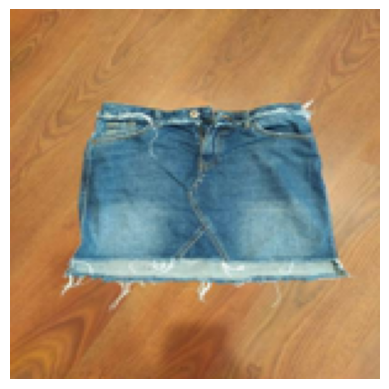

In [21]:
from PIL import Image

image = Image.open('clothing-dataset-small/train/skirt/4d4f6900-da14-4e6c-9236-e3a98261fdc2.jpg')
image = image.resize(size=(150,150))

plt.axis("off")
plt.imshow(image)

In [22]:
img = np.array([[[x/255 for x in y] for y in z] for z in np.asarray(image)])

In [23]:
base_model.shape

(1, 3, 3, 3, 32)

In [24]:
r_colv = convolve3d_all(img, [base_model[:, :,:,:,i][0] for i in range(32)], 2, 1)

100%|██████████| 32/32 [00:01<00:00, 18.08it/s]


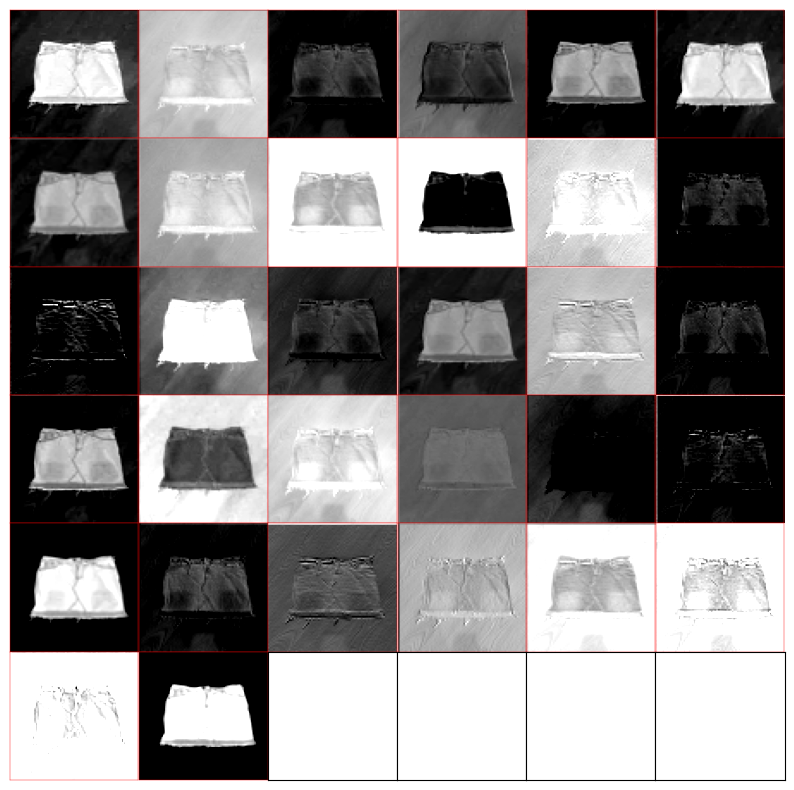

In [25]:
showImages([np.sum(r_colv[i].get_rgb(), axis=-1) for i in range(32)], figy=10, v=(-1,1))

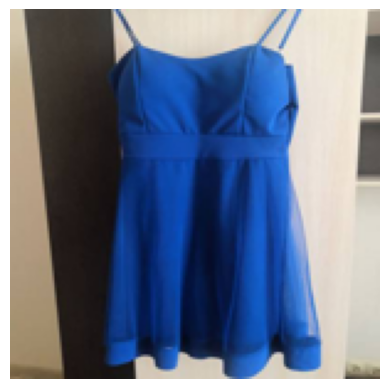

In [26]:
image2 = Image.open('clothing-dataset-small/train/dress/6b779a54-4cdc-4205-ba1f-9597c779a683.jpg')
image2 = image2.resize(size=(150,150))

plt.axis("off")
plt.imshow(image2)

img2 = np.array([[[x/255 for x in y] for y in z] for z in np.asarray(image2)])

In [27]:
r_colv2 = convolve3d_all(img2, [base_model[:, :,:,:,i][0] for i in range(32)], 2, 1)

100%|██████████| 32/32 [00:01<00:00, 17.69it/s]


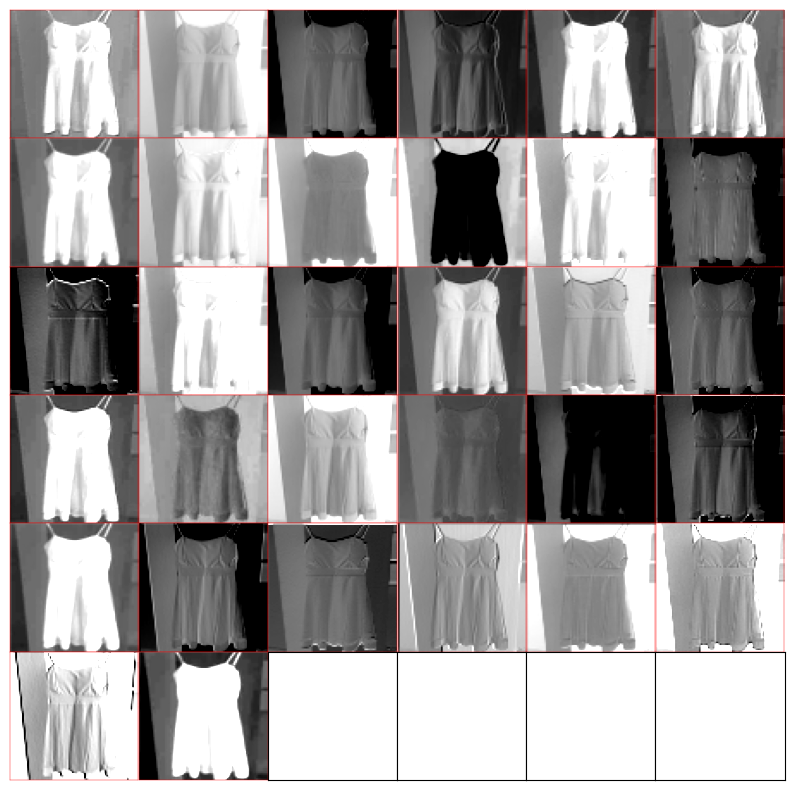

In [28]:
showImages([np.sum(r_colv2[i].get_rgb(), axis=-1) for i in range(32)], figy=10, v=(-1,1))

### Test

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [99]:
def show_transformed(gen):
    x = gen.flow(np.expand_dims(img2, axis=0), batch_size=4, seed=42)
    plt.imshow(next(x)[0])

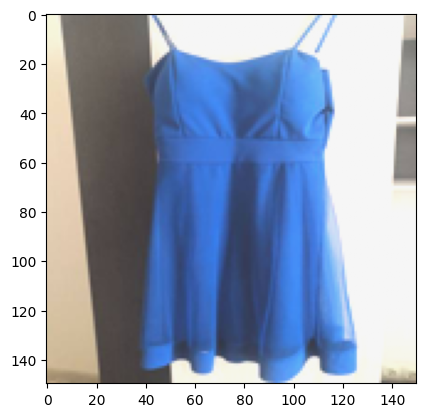

In [102]:
gen = ImageDataGenerator(channel_shift_range=0.4, fill_mode='nearest', cval=0)
show_transformed(gen)